# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [582]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [182]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

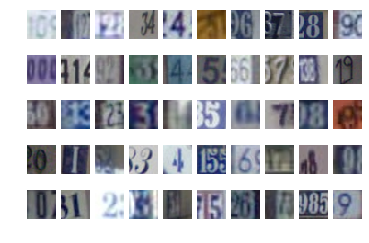

In [183]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [184]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [185]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`.

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

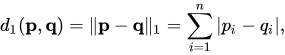

In [186]:
# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [187]:
# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [188]:
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [189]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

19.9 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
36.3 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
38.5 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [190]:
(binary_train_X.shape, binary_test_X.shape)

((155, 3072), (16, 3072))

In [191]:
# TODO: implement predict_labels_binary in knn.py
prediction = knn_classifier.predict(binary_test_X)

In [192]:
# TODO: implement binary_classification_metrics in metrics.py
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 1.00, Precision: 0.50, Recall: 0.43, F1: 0.46


In [193]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1))

KNN with k = 3
Accuracy: 1.00, Precision: 0.50, Recall: 0.43, F1: 0.46


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение параметра k для алгоритма KNN! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [197]:
binary_train_X.shape

(155, 3072)

In [204]:
np.array_split(binary_train_X, 5)[0].shape

(31, 3072)

In [543]:
# Find the best k using cross-validation based on F1 score
num_folds = 5
train_folds_X = np.array_split(binary_train_X, num_folds)
train_folds_y = np.array_split(binary_train_y, num_folds)

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)

def splitX(ar, i):
    A=ar[:i]
    B=ar[i+1:]
    arr=[A,B]
    vstacked=[np.vstack(e) for e in arr if e]
    return (np.vstack(vstacked),ar[i])

def splity(ar, i):
    A=ar[:i]
    B=ar[i+1:]
    arr=[e for e in [A,B] if e]
    return (functools.reduce((lambda x,y:np.append(x,y)), np.vstack(arr)),ar[i])

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for training
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1
    
    f1i=[]
    for i in range(num_folds):
        train_i_X,test_i_X=splitX(train_folds_X, i)
        train_i_y,test_i_y=splity(train_folds_y, i)
#         print(f'i={i}, {train_i_X.shape}, {test_i_X.shape}')
#         print(f'       {train_i_y.shape}, {test_i_y.shape}')
        knn_classifier=KNN(k=k)
        knn_classifier.fit(train_i_X, train_i_y)
        
        prediction = knn_classifier.predict(test_i_X)
        precision, recall, f1, accuracy = binary_classification_metrics(prediction, test_i_y)
        f1i.append(f1)
    print(f'k={k}, f1i={f1i}')
    mean_f1i=sum(f1i)/len(f1i)
    k_to_f1[k]=mean_f1i
    

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k=1, f1i=[0.47058823529411764, 0.6842105263157896, 0.5925925925925926, 0.6486486486486486, 0.5625000000000001]
k=2, f1i=[0.30769230769230765, 0.5185185185185185, 0.5263157894736842, 0.42857142857142855, 0.3157894736842105]
k=3, f1i=[0.5625, 0.5882352941176471, 0.5333333333333333, 0.5555555555555556, 0.4]
k=5, f1i=[0.5, 0.5625, 0.4666666666666667, 0.6470588235294118, 0.5185185185185186]
k=8, f1i=[0.37037037037037035, 0.6000000000000001, 0.48, 0.35714285714285715, 0.19047619047619047]
k=10, f1i=[0.30769230769230765, 0.6666666666666667, 0.5, 0.35714285714285715, 0.2608695652173913]
k=15, f1i=[0.35714285714285715, 0.6666666666666665, 0.5333333333333333, 0.3225806451612903, 0.5]
k=20, f1i=[0.29629629629629634, 0.6666666666666667, 0.43750000000000006, 0.23076923076923073, 0.5333333333333333]
k=25, f1i=[0.29629629629629634, 0.6060606060606061, 0.4666666666666667, 0.35714285714285715, 0.4827586206896552]
k=50, f1i=[0.35714285714285715, 0.5161290322580646, 0.45714285714285713, 0.153846153846153

### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [547]:
# TODO Set the best k to the best value found by cross-validation
best_k = 8

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 8
Accuracy: 1.00, Precision: 0.25, Recall: 0.14, F1: 0.18


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [566]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=5)
knn_classifier.fit(train_X, train_y)

In [571]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

In [584]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.20


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [ ]:
# Find the best k using cross-validation based on accuracy
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce accuracy metric on the validation dataset
    # Average accuracy from all the folds and write it into k_to_accuracy
    acci=[]
    for i in range(num_folds):
        train_i_X,test_i_X=splitX(train_folds_X, i)
        train_i_y,test_i_y=splity(train_folds_y, i)
#         print(f'i={i}, {train_i_X.shape}, {test_i_X.shape}')
#         print(f'       {train_i_y.shape}, {test_i_y.shape}')
        knn_classifier=KNN(k=k)
        knn_classifier.fit(train_i_X, train_i_y)
        
        prediction = knn_classifier.predict(test_i_X)
        accuracy = multiclass_accuracy(prediction, test_i_y)
        acci.append(accuracy)
    print(f'k={k}, accuracy={acci}')
    mean_acci=sum(acci)/len(acci)
    k_to_f1[k]=mean_acci

for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [ ]:
# TODO Set the best k as a best from computed
best_k = 1

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)